# Capstone project collaboration Team-9
# Bootcamp in Data Analysis/ Pyladies Amsterdam 2020
# COVID-19: Myths and facts 

## Motivation:
**Covid-19 is a new virus, but it has already been a subject of a few conspiracy theories. We have decided to take a role of MythBusters by using data analysis. We had a lot of ideas, but unfortunately with regards with some rumours, we were lacking the data.**

These are the questions: 
     * What is the most Covid-19 affected continent in terms of infected cases and deaths?
     * Do countries where BCG vaccine was widely implemented have higher life expectancy? 
     * Do countries where BCG vaccine was widely implemented have fewer infection rates per million?
     * Do countries with higher life expectancy suffer more from Covid-19 in terms of deaths recorded?
     * What country has the highest ratio of recovered cases?

## Data

* [Life expectancy and BCG coverage from Kaggle](https://www.kaggle.com/nxpnsv/country-health-indicators)

* [Covid-19 data as of 31.05.20 from Worldometers ](https://www.worldometers.info/coronavirus/)

## Data cleaning

In [1]:
# Importing the necessery libraries
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 

In [2]:
# Read the data and store it in chosen variable
health_indicators = 'data_team-9/health_indicators.csv'
health_df = pd.read_csv(health_indicators)
covid19_file = 'data_team-9/worldometers_coronavirus.csv'
covid19_df = pd.read_csv(covid19_file)

In [3]:
# Displaying the top 5 rows of Health dataset
health_df.head()

,Country_Region,first_1ConfirmedCases,first_1Fatalities,first_10ConfirmedCases,first_50ConfirmedCases,first_100ConfirmedCases,cases_growth,death_growth,Cardiovascular diseases (%),Cancers (%),...,total fertility rate,obesity - adult prevalence rate,school_shutdown_1case,school_shutdown_10case,school_shutdown_50case,school_shutdown_1death,FF_DayOfYear,case1_DayOfYear,case10_DayOfYear,case50_DayOfYear
0,Afghanistan,2020-02-24,2020-03-22,2020-03-14,2020-03-24,2020-03-27,0.174179,0.083333,8.953006,3.372082,...,4.82,5.5,19.0,-0.0,-10.0,-8.0,82.0,55,74.0,84.0
1,Albania,2020-03-09,2020-03-11,2020-03-10,2020-03-16,2020-03-23,0.068699,0.130051,27.016784,13.225390,...,1.53,21.7,2.0,1.0,-5.0,-0.0,71.0,69,70.0,76.0
2,Algeria,2020-02-25,2020-03-12,2020-03-04,2020-03-16,2020-03-21,0.158588,0.228578,17.005476,6.481729,...,2.59,27.4,16.0,8.0,-4.0,-0.0,72.0,56,64.0,76.0
3,Andorra,2020-03-02,2020-03-22,2020-03-17,2020-03-19,2020-03-22,0.082774,0.345238,13.784688,17.879279,...,1.43,25.6,14.0,-1.0,-3.0,-6.0,82.0,62,77.0,79.0
4,Angola,2020-03-20,2020-03-29,NaN,NaN,NaN,0.132143,0.000000,4.480300,3.011632,...,5.96,8.2,4.0,NaN,NaN,-5.0,89.0,80,NaN,NaN


In [4]:
# Displaying all the columns in Health dataset
health_df.columns

Index(['Country_Region', 'first_1ConfirmedCases', 'first_1Fatalities',
       'first_10ConfirmedCases', 'first_50ConfirmedCases',
       'first_100ConfirmedCases', 'cases_growth', 'death_growth',
       'Cardiovascular diseases (%)', 'Cancers (%)',
       'Diabetes, blood, & endocrine diseases (%)', 'Respiratory diseases (%)',
       'Liver disease (%)', 'Diarrhea & common infectious diseases (%)',
       'Musculoskeletal disorders (%)', 'HIV/AIDS and tuberculosis (%)',
       'Malaria & neglected tropical diseases (%)',
       'Nutritional deficiencies (%)', 'pneumonia-death-rates',
       'Share of deaths from smoking (%)', 'alcoholic_beverages',
       'animal_fats', 'animal_products', 'aquatic_products,_other',
       'cereals_-_excluding_beer', 'eggs', 'fish,_seafood',
       'fruits_-_excluding_wine', 'meat', 'milk_-_excluding_butter',
       'miscellaneous', 'offals', 'oilcrops', 'pulses', 'spices',
       'starchy_roots', 'stimulants', 'sugar_&_sweeteners', 'treenuts',
       '

In [5]:
# Selecting the only columns we need in Health dataset
health_df = health_df[["Country_Region","bcg_coverage","life expectancy at birth","infant mortality rate"]]
health_df.tail()

,Country_Region,bcg_coverage,life expectancy at birth,infant mortality rate
175,Venezuela,82.0,71.0,27.9
176,Vietnam,97.0,74.4,15.7
177,West Bank and Gaza,NaN,NaN,NaN
178,Zambia,99.0,53.6,56.0
179,Zimbabwe,90.0,62.3,30.3


In [6]:
# Renaming the column names in Health dataset for convinience 
health_df = health_df.rename(columns={"Country_Region":"country_region", "bcg_coverage":"bcg",
                                      "life expectancy at birth":"life_expectancy","infant mortality rate":"infant_mortality"})
health_df.head()

,country_region,bcg,life_expectancy,infant_mortality
0,Afghanistan,86.0,52.8,104.3
1,Albania,99.0,79.0,10.8
2,Algeria,99.0,77.5,17.6
3,Andorra,NaN,83.0,3.5
4,Angola,79.0,61.3,62.3


In [7]:
health_df.shape

(180, 4)

In [8]:
# Displaying the top 5 rows of Сovid19 dataset
covid19_df.head()

,continent,country_region,total_cases,total_deaths,total_recovered,active_cases,critical,total cases/\n1M pop,deaths/\n1M pop,total_tests,tests/\n1M pop,population
0,Europe,Russia,"405,843","4,693","171,883","229,267","2,300","2,781",32,"10,643,124","72,933","145,929,507"
1,Europe,Spain,"286,509","27,127","196,958","62,424",617,"6,128",580,"4,063,843","86,921","46,753,345"
2,Europe,UK,"274,762","38,489",NaN,NaN,"1,559","4,049",567,"4,285,738","63,158","67,856,881"
3,Europe,Italy,"232,997","33,415","157,507","42,075",435,"3,853",553,"3,878,739","64,144","60,468,778"
4,Europe,France,"188,882","28,802","68,355","91,725","1,319","2,894",441,"1,384,633","21,217","65,261,942"


In [9]:
# Displaying all the columns in Covid19 dataset
covid19_df.columns

Index(['continent', 'country_region', 'total_cases', 'total_deaths',
       'total_recovered', 'active_cases', 'critical', 'total cases/\n1M pop',
       'deaths/\n1M pop', 'total_tests', 'tests/\n1M pop', 'population'],
      dtype='object')

In [10]:
# Selecting the only columns we need in Covid19 dataset
covid19_df = covid19_df[['continent','country_region', 'total_cases', 'total_deaths','total cases/\n1M pop']]

In [11]:
covid19_df = covid19_df.rename(columns={"total cases/\n1M pop":"total_cases_1M_pop"})

**Countries are named differently in two datasets, so we rename them in order not to lose values**

In [12]:
# Saving countries in the first variable
country_health = health_df.country_region.unique()

In [13]:
# Saving countries in the second variable
country_covid = covid19_df.country_region.unique()

In [14]:
# Checking for the difference between the Covid19 and Health datasets
# Displaying countries as they presented in Covid19 dataset
country_dif = set(country_covid) - set(country_health)
print(country_dif)

{'British Virgin Islands', 'French Guiana', 'Guadeloupe', 'Falkland Islands', 'Mayotte', 'Malawi', 'Yemen', 'Anguilla', 'South Sudan', 'Réunion', 'Western Sahara', 'S. Korea', 'UAE', 'Martinique', 'Hong Kong', 'New Caledonia', 'Palestine', 'Tajikistan', 'French Polynesia', 'Vatican City', 'Ivory Coast', 'St. Barth', 'Aruba', 'DRC', 'Saint Martin', 'Gibraltar', 'Bermuda', 'Faeroe Islands', 'Sint Maarten', 'UK', 'Taiwan', 'Lesotho', 'Channel Islands', 'St. Vincent Grenadines', 'USA', 'Cayman Islands', 'Turks and Caicos', 'Saint Pierre Miquelon', 'Congo', 'Caribbean Netherlands', 'Myanmar', 'Sao Tome and Principe', 'Curaçao', 'Macao', 'Isle of Man', 'CAR', 'Montserrat', 'Greenland', 'Comoros'}


In [15]:
# Checking for the difference between the Health and Covid19 datasets
# Displaying countries as they presented in Health dataset
country_dif2 = set(country_health) - set(country_covid)
print(country_dif2)

{'Taiwan*', 'Diamond Princess', 'Congo (Kinshasa)', 'United Kingdom', 'Korea, South', 'United Arab Emirates', 'Central African Republic', 'US', 'Kosovo', 'West Bank and Gaza', 'Holy See', 'Saint Vincent and the Grenadines', 'Burma', 'Congo (Brazzaville)', 'MS Zaandam', "Cote d'Ivoire"}


In [16]:
# Replacing the names 
covid19_df["country_region"] = covid19_df["country_region"].rename({"Myanmar":"Burma"})

In [17]:
# Replacing the names 
health_df["country_region"] = health_df["country_region"].replace({"Taiwan*":"Taiwan","Korea, South":"S.Korea", "United Kingdom":"UK",
                     "US":"USA","Central African Republic":"CAR",
                    "United Arab Emirates":"UAE","West Bank and Gaza":"Palestine"})

## Question1: *What is the most Covid-19 affected continent in terms of infected cases and deaths?*

**The virus, which causes a respiratory illness called COVID-19 has spread across the six continents. We want to see what continent has been affected the most.**


In [18]:
# Display how many countries do we have for each continent  
covid19_df.continent.value_counts()

Africa           57
Asia             49
Europe           48
North America    39
South America    14
Oceania           6
Name: continent, dtype: int64

In [19]:
# create dataframe with total infected cases and deaths per continent: Europe
europe_df = covid19_df.loc[covid19_df['continent'] == 'Europe', ['total_cases','total_deaths']]
# europe_df.head(10)
# europe_df.count()
# europe_df.info()
europe_df_int = europe_df.apply(lambda x: x.str.replace(',',''))
europe_df_int_na = europe_df_int.dropna()
# europe_df['total_cases'] = pd.to_numeric(europe_df['total_cases'])
total_cases_europe = europe_df_int_na.total_cases.astype(int).sum()
total_deaths_europe = europe_df_int_na.total_deaths.astype(int).sum()

In [20]:
# create dataframe with total infected cases and deaths per continent: North America
north_america_df = covid19_df.loc[covid19_df['continent'] == 'North America', ['total_cases','total_deaths']]
# north_america_df.head(10)
# north_america_df.count()
north_america_df_int = north_america_df.apply(lambda x: x.str.replace(',',''))
north_america_df_int_na = north_america_df_int.dropna()
total_cases_NA = north_america_df_int_na.total_cases.astype(int).sum()
total_deaths_NA = north_america_df_int_na.total_deaths.astype(int).sum()

In [21]:
# create dataframe with total infected cases and deaths per continent: Asia
asia_df = covid19_df.loc[covid19_df['continent'] == 'Asia', ['total_cases','total_deaths']]
# asia_df.head(10)
# asia_df.count()
asia_df_int = asia_df.apply(lambda x: x.str.replace(',',''))
asia_df_int_na = asia_df_int.dropna()
total_cases_asia = asia_df_int_na.total_cases.astype(int).sum()
total_deaths_asia = asia_df_int_na.total_deaths.astype(int).sum()

In [22]:
# create dataframe with total infected cases and deaths per continent: South America
south_america_df = covid19_df.loc[covid19_df['continent'] == 'South America', ['total_cases','total_deaths']]
# south_america_df.head(10)
# south_america_df.count()
south_america_df_int = south_america_df.apply(lambda x: x.str.replace(',',''))
south_america_df_int_na = south_america_df_int.dropna()
total_cases_SA = south_america_df_int_na.total_cases.astype(int).sum()
total_deaths_SA = south_america_df_int_na.total_deaths.astype(int).sum()

In [23]:
# create dataframe with total infected cases and deaths per continent: Africa
afrika_df = covid19_df.loc[covid19_df['continent'] == 'Africa', ['total_cases','total_deaths']]
# afrika_df.head(10)
# afrika_df.count()
afrika_df_int = afrika_df.apply(lambda x: x.str.replace(',',''))
afrika_df_int_na = afrika_df_int.dropna()
total_cases_afrika = afrika_df_int_na.total_cases.astype(int).sum()
total_deaths_afrika = afrika_df_int_na.total_deaths.astype(int).sum()

In [24]:
# create dataframe with total infected cases and deaths per continent: Oceania
oceania_df = covid19_df.loc[covid19_df['continent'] == 'Oceania', ['total_cases','total_deaths']]
# oceania_df.head(10)
# oceania_df.count()
oceania_df_int = oceania_df.apply(lambda x: x.str.replace(',',''))
oceania_df_int_na = oceania_df_int.dropna()
total_cases_oceania = oceania_df_int_na.total_cases.astype(int).sum()
total_deaths_oceania = oceania_df_int_na.total_deaths.astype(int).sum()

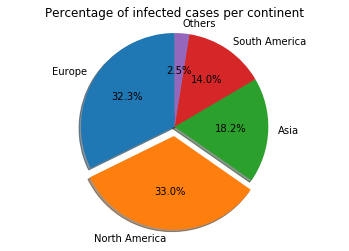

In [25]:
# visualizing question: What is the most Covid-19 affected continent in terms of infected cases?
labels = 'Europe', 'North America', 'Asia', 'South America', 'Others'
sizes = [total_cases_europe, total_cases_NA, total_cases_asia, total_cases_SA, (total_cases_afrika + total_cases_oceania)]
explode = (0, 0.1, 0, 0, 0)
fig, ax = plt.subplots ()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
plt.title('Percentage of infected cases per continent')
plt.show()

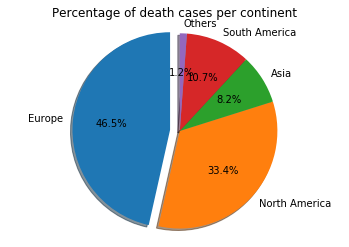

In [26]:
# visualizing question: What is the most Covid-19 affected continent in terms of infected cases?
labels = 'Europe', 'North America', 'Asia', 'South America', 'Others'
sizes = [total_deaths_europe, total_deaths_NA, total_deaths_asia, total_deaths_SA, (total_deaths_afrika + total_deaths_oceania)]
explode = (0.1, 0, 0, 0, 0)
fig, ax = plt.subplots ()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
plt.title('Percentage of death cases per continent')
plt.show()

## Conclusion: 
**As of the data available on the 31st of May 2020 - Europe is the most affected continent in terms of Covid-19 related deaths and North America is the most affected continenr in terms of Covid-19 infection cases.**

## Question2: *Do countries where BCG vaccine was widely implemented have higher life expectancy or lower infant mortality rate?*

**Vaccines play a central role in increasing life expectancy. We want to see whether Bacille Calmette–Guerin (BCG) vaccine alone has any correlation with life expectancy. The BCG vaccine is the most commonly used vaccine against tuberculosis (TB) worldwide. The vaccine is commonly given to infants under 1 years old.**

In [27]:
health_df.sample()

,country_region,bcg,life_expectancy,infant_mortality
156,Suriname,NaN,73.3,22.1


In [28]:
# Viewing basic descriptive stats of BCG coverage
health_df["bcg"].describe()

count    139.000000
mean      89.618705
std       14.147974
min       24.000000
25%       86.500000
50%       96.000000
75%       98.500000
max       99.000000
Name: bcg, dtype: float64

In [29]:
# Viewing basic descriptive stats of infant mortality
# Infant mortality rate is the number of deaths per 1,000 live births of children under one year of age. 
health_df["infant_mortality"].describe()

count    164.000000
mean      20.842683
std       20.288738
min        1.700000
25%        5.300000
50%       11.650000
75%       30.325000
max      104.300000
Name: infant_mortality, dtype: float64

In [30]:
# Viewing basic descriptive stats of infant mortality
health_df["life_expectancy"].describe()

count    164.000000
mean      73.467683
std        7.248634
min       52.800000
25%       68.800000
50%       75.250000
75%       78.525000
max       86.000000
Name: life_expectancy, dtype: float64

In [31]:
# Checking how many countries we have in Health dataset
len(health_df["country_region"].unique())

180

In [32]:
# Removing the rows (countries) with missing data and checking how many countries we have left
health_df = health_df.dropna()
len(health_df["country_region"].unique())

138

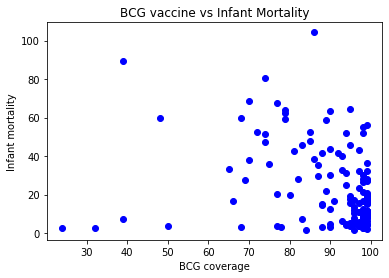

In [33]:
# show distribution of the results
plt.scatter(health_df['bcg'], health_df['infant_mortality'], color = 'blue')
plt.title("BCG vaccine vs Infant Mortality")
plt.xlabel("BCG coverage")
plt.ylabel("Infant mortality")
plt.show()

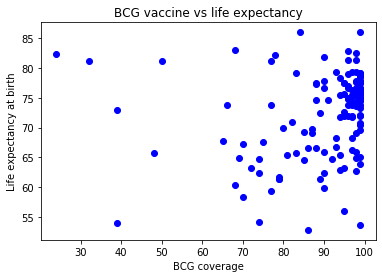

In [34]:
# show distribution of the results
plt.scatter(health_df['bcg'], health_df['life_expectancy'], color = 'blue')
plt.title("BCG vaccine vs life expectancy")
plt.xlabel("BCG coverage")
plt.ylabel("Life expectancy at birth")
plt.show()

In [35]:
# show that countries with higher bcg coverage have lower infant mortality rates
health_df.loc[(health_df['infant_mortality'] <= 10), ['country_region', 'bcg']]

,country_region,bcg
6,Argentina,99.0
9,Austria,90.0
15,Belarus,97.0
21,Bosnia and Herzegovina,95.0
24,Brunei,99.0
25,Bulgaria,96.0
35,Chile,93.0
40,Costa Rica,83.0
42,Croatia,98.0
43,Cuba,99.0


In [36]:
# show that even countries with higher bcg coverage often have lower life expectancy
health_df.loc[(health_df['bcg'] >= 60), ['country_region', 'life_expectancy']]

,country_region,life_expectancy
0,Afghanistan,52.8
1,Albania,79.0
2,Algeria,77.5
4,Angola,61.3
6,Argentina,77.8
...,...,...
174,Uzbekistan,74.8
175,Venezuela,71.0
176,Vietnam,74.4
178,Zambia,53.6


## **Conclusion:** 
**One possible explanation behind the inconclusive results is that BCG vaccine is not mandatory in more developed countries with lower risks of TB.**

## Question3: *Do countries where BCG vaccine was widely implemented have fewer infection rates per million?*

**The spread of COVID-19 and its impact varies across countries in the world. There were rumours that lower frequency of cases and mortalities can be attributed to Bacille Calmette–Guerin (BCG) vaccination. The BCG vaccine is the most commonly used vaccine against tuberculosis (TB) worldwide**

**Merging the two datasets**:

In [37]:
merged_df = covid19_df.merge(health_df, on = ['country_region']) 
merged_df.head()

,continent,country_region,total_cases,total_deaths,total_cases_1M_pop,bcg,life_expectancy,infant_mortality
0,Europe,Russia,"405,843","4,693","2,781",96.0,71.9,6.5
1,Europe,France,"188,882","28,802","2,894",78.0,82.2,3.2
2,Europe,Belarus,"42,556",235,"4,503",97.0,73.8,3.5
3,Europe,Sweden,"37,542","4,395","3,719",24.0,82.4,2.6
4,Europe,Portugal,"32,500","1,410","3,187",32.0,81.1,2.6


In [38]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 0 to 134
Data columns (total 8 columns):
continent             135 non-null object
country_region        135 non-null object
total_cases           135 non-null object
total_deaths          122 non-null object
total_cases_1M_pop    135 non-null object
bcg                   135 non-null float64
life_expectancy       135 non-null float64
infant_mortality      135 non-null float64
dtypes: float64(3), object(5)
memory usage: 9.5+ KB


In [39]:
# drop NaN values
merged_df = merged_df.dropna()
merged_df.shape

(122, 8)

In [52]:
# change dtype of only 1 column to float
merged_df["total_cases_1M_pop"] = merged_df["total_cases_1M_pop"].apply(lambda x: float(x.replace(',','')))
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 8 to 52
Data columns (total 8 columns):
continent             122 non-null object
country_region        122 non-null object
total_cases           122 non-null float64
total_deaths          122 non-null object
total_cases_1M_pop    122 non-null float64
bcg                   122 non-null float64
life_expectancy       122 non-null float64
infant_mortality      122 non-null float64
dtypes: float64(5), object(3)
memory usage: 8.6+ KB


In [53]:
merged_df= merged_df.sort_values(by=['total_cases_1M_pop'])
print(merged_df)

         continent country_region  total_cases total_deaths  \
126         Africa         Angola          3.0            4   
127         Africa        Burundi          5.0            1   
75            Asia          Syria          7.0            5   
122         Africa     Mozambique          8.0            2   
116         Africa       Tanzania          9.0           21   
..             ...            ...          ...          ...   
5           Europe        Ireland       5066.0        1,652   
80   South America          Chile       5219.0        1,054   
49            Asia      Singapore       5967.0           23   
51            Asia         Kuwait       6341.0          212   
47            Asia          Qatar      19783.0           38   

     total_cases_1M_pop   bcg  life_expectancy  infant_mortality  
126                 3.0  79.0             61.3              62.3  
127                 5.0  93.0             66.7              40.1  
75                  7.0  66.0             

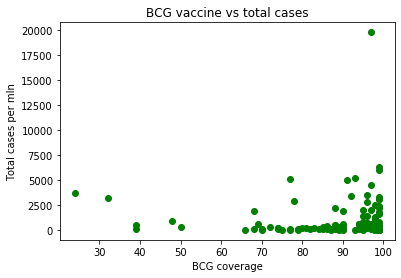

In [55]:
# show distribution of the results
plt.scatter(merged_df['bcg'], merged_df['total_cases_1M_pop'], color = 'green')

plt.title("BCG vaccine vs total cases")
plt.xlabel("BCG coverage")
plt.ylabel("Total cases per mln")
plt.show()

## Conclusion: 
**We find no correlation between the BCG vaccination coverage and the number of total Covid-19 infected cases per 1 million of population**